In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### UNIVARIATE AND BIVARIATE ANALYSIS

### STATISTICAL ANALYSIS

### DATA PROCESSING

In [5]:
df.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [6]:
df.isnull().sum()/len(df)

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

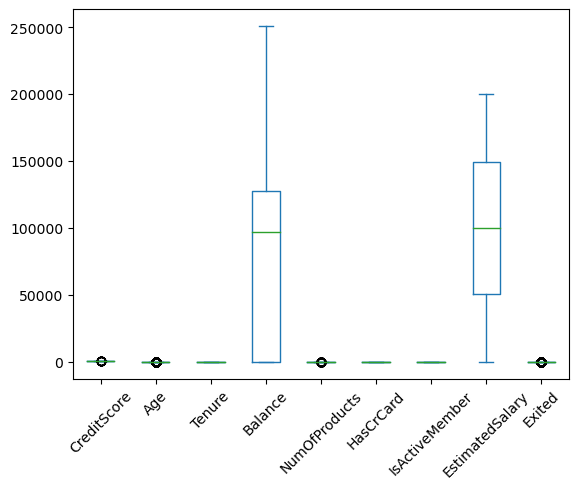

In [7]:
df.plot(kind='box')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### TRAIN TEST SPLIT

In [9]:
y = df.Exited
x = df.drop('Exited', axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=2, stratify=y)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(9000, 10) (1000, 10) (9000,) (1000,)


In [10]:
# frequency Encoding
geoEncoding = xtrain['Geography'].value_counts().to_dict()

In [11]:
xtrain.Geography = xtrain['Geography'].map(geoEncoding)
xtest.Geography = xtest['Geography'].map(geoEncoding)

In [12]:
# get dummeis

xtrain = pd.get_dummies(xtrain, drop_first=True, dtype='int32')
xtest = pd.get_dummies(xtest, drop_first=True, dtype='int32')

In [13]:
xtrain.shape, xtest.shape

((9000, 10), (1000, 10))

### PREDICTIVE MODELING

In [14]:
acc = []
recall = []
prec = []
f1 = []
model_name = []

def modelValidation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred_h = m.predict(xtest)
    pred_s = m.predict_proba(xtest)[:,1]
    print("Classification Report:\n", classification_report(ytest, pred_h))
    
    fpr, tpr, thr = roc_curve(ytest, pred_s)
    plt.plot([0,1], [0,1], ls='--', color='red')
    plt.plot(fpr, tpr)
    plt.show()
    
    res = input("Do you want to keep this model[y/n]")
    if res.lower() == 'y':
        model_name.append(str(m))
        acc.append(accuracy_score(ytest, pred_h))
        recall.append(recall_score(ytest, pred_h))
        prec.append(precision_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        
        global df_score
        df_score = pd.DataFrame({'Model':model_name, 'Accuracy': acc, 'Precision':prec, 
                                 'Recall':recall, 'F1-Score':f1})
        return m

### DECISION TREE

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.74      0.37      0.49       204

    accuracy                           0.84      1000
   macro avg       0.80      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000



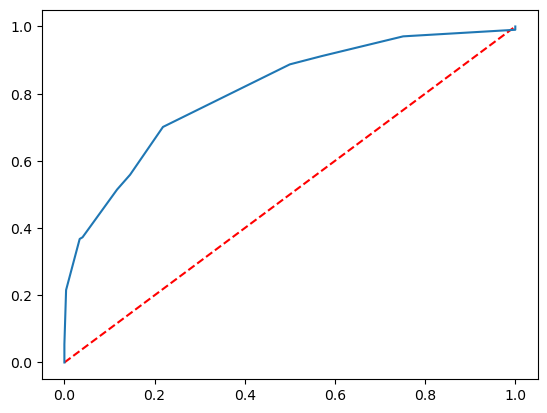

Do you want to keep this model[y/n]y


DecisionTreeClassifier(max_depth=4)

In [15]:
modelValidation(DecisionTreeClassifier(max_depth=4), xtrain, ytrain, xtest, ytest)

In [16]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196


### NAVE

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       796
           1       0.33      0.08      0.13       204

    accuracy                           0.78      1000
   macro avg       0.57      0.52      0.50      1000
weighted avg       0.71      0.78      0.72      1000



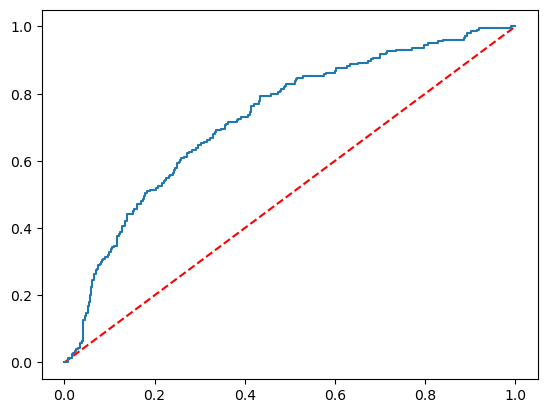

Do you want to keep this model[y/n]y


GaussianNB()

In [17]:
modelValidation(GaussianNB(), xtrain, ytrain, xtest, ytest)

In [18]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984


### RANDON FOREST

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



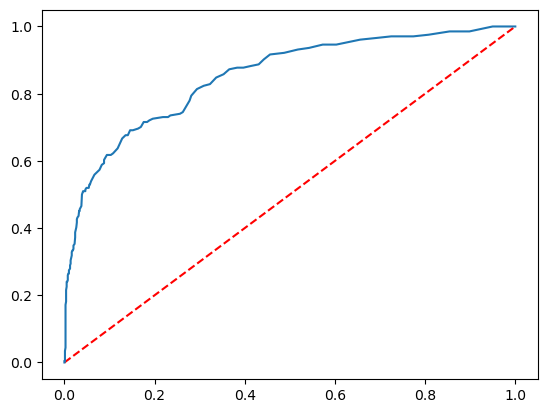

Do you want to keep this model[y/n]y


RandomForestClassifier(n_estimators=150)

In [19]:
modelValidation(RandomForestClassifier(n_estimators=150), xtrain, ytrain, xtest, ytest)

In [20]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984
2,RandomForestClassifier(n_estimators=150),0.861,0.773109,0.450980,0.569659


### ADABoost

In [21]:
modelValidation(AdaBoostClassifier())

TypeError: modelValidation() missing 4 required positional arguments: 'xtrain', 'ytrain', 'xtest', and 'ytest'

### Gradient Boosting

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.77      0.47      0.59       204

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.86      0.86      0.85      1000



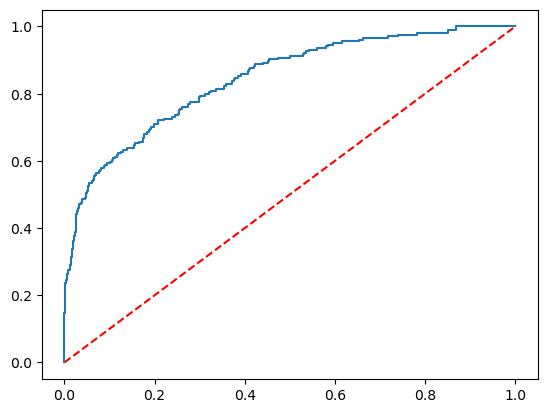

Do you want to keep this model[y/n]y


GradientBoostingClassifier(max_depth=7, n_estimators=150)

In [22]:
modelValidation(GradientBoostingClassifier(n_estimators=150, max_depth=7),xtrain, ytrain, xtest, ytest)

In [23]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984
2,RandomForestClassifier(n_estimators=150),0.861,0.773109,0.450980,0.569659
3,"GradientBoostingClassifier(max_depth=7, n_esti...",0.864,0.774194,0.470588,0.585366


### XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.70      0.48      0.57       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



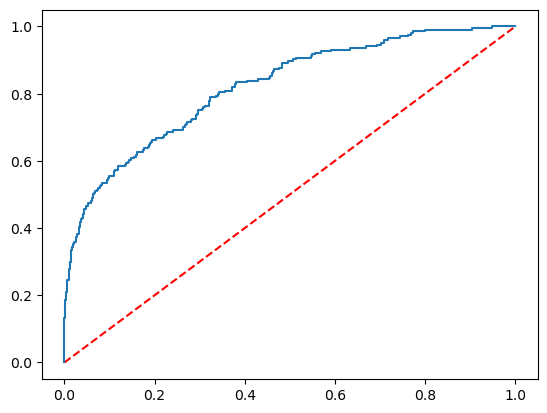

Do you want to keep this model[y/n]y


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
modelValidation(XGBClassifier(n_estimators=100, max_depth=7), xtrain, ytrain , xtest, ytest)

In [25]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984
2,RandomForestClassifier(n_estimators=150),0.861,0.773109,0.450980,0.569659
3,"GradientBoostingClassifier(max_depth=7, n_esti...",0.864,0.774194,0.470588,0.585366
4,"XGBClassifier(base_score=None, booster=None, c...",0.851,0.697842,0.475490,0.565598


### Voting

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.43      0.54       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



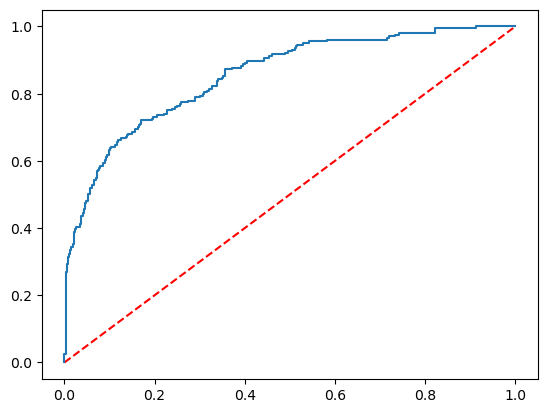

Do you want to keep this model[y/n]y


VotingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=8)),
                             ('RF',
                              RandomForestClassifier(max_depth=13,
                                                     n_estimators=150)),
                             ('ADABoost', AdaBoostClassifier(n_estimators=200)),
                             ('GB',
                              GradientBoostingClassifier(max_depth=10,
                                                         n_estimators=150))],
                 voting='soft')

In [26]:
base = [('DT', DecisionTreeClassifier(max_depth=8)), 
        ('RF', RandomForestClassifier(n_estimators=150, max_depth=13)),
       ('ADABoost', AdaBoostClassifier(n_estimators=200)),
       ('GB', GradientBoostingClassifier(n_estimators=150, max_depth=10))]

modelValidation(VotingClassifier(estimators=base, voting='soft'), xtrain, ytrain, xtest, ytest)

In [27]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984
2,RandomForestClassifier(n_estimators=150),0.861,0.773109,0.450980,0.569659
3,"GradientBoostingClassifier(max_depth=7, n_esti...",0.864,0.774194,0.470588,0.585366
4,"XGBClassifier(base_score=None, booster=None, c...",0.851,0.697842,0.475490,0.565598
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.854,0.750000,0.426471,0.543750


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.47      0.55       204

    accuracy                           0.84      1000
   macro avg       0.77      0.70      0.73      1000
weighted avg       0.83      0.84      0.83      1000



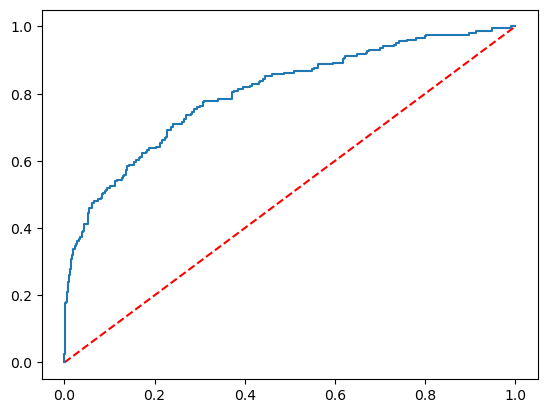

Do you want to keep this model[y/n]y


StackingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=15)),
                               ('RF', RandomForestClassifier(max_depth=12)),
                               ('ADABoost',
                                AdaBoostClassifier(n_estimators=250)),
                               ('GB',
                                GradientBoostingClassifier(max_depth=10,
                                                           n_estimators=150))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=N...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=12, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [29]:
base = [('DT', DecisionTreeClassifier(max_depth=15)), 
        ('RF', RandomForestClassifier(n_estimators=100, max_depth=12)),
       ('ADABoost', AdaBoostClassifier(n_estimators=250)),
       ('GB', GradientBoostingClassifier(n_estimators=150, max_depth=10))]

modelValidation(StackingClassifier(estimators=base, final_estimator=XGBClassifier(n_estimators=100, max_depth=12)),
                xtrain, ytrain, xtest, ytest)

In [30]:
df_score

,Model,Accuracy,Precision,Recall,F1-Score
0,DecisionTreeClassifier(max_depth=4),0.844,0.735294,0.367647,0.490196
1,GaussianNB(),0.780,0.333333,0.078431,0.126984
2,RandomForestClassifier(n_estimators=150),0.861,0.773109,0.450980,0.569659
3,"GradientBoostingClassifier(max_depth=7, n_esti...",0.864,0.774194,0.470588,0.585366
4,"XGBClassifier(base_score=None, booster=None, c...",0.851,0.697842,0.475490,0.565598
5,"VotingClassifier(estimators=[('DT', DecisionTr...",0.854,0.750000,0.426471,0.543750
6,"StackingClassifier(estimators=[('DT', Decision...",0.842,0.659722,0.465686,0.545977


### Fine Tunning

In [31]:
grid = {'n_estimators':[100,150,200,250,300,350],
       'gamma':[0,1,2,3,4],
       'max_depth':[7, 10,13, 16,19]}

grid_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, scoring='recall', cv=5, verbose=1)
grid_xgb.fit(xtrain, ytrain)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 4],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

In [32]:
grid_xgb.best_params_

{'gamma': 0, 'max_depth': 10, 'n_estimators': 350}

In [35]:
grid_xgb.best_score_

0.498615267789342

### Final Model

In [34]:
final_model = XGBClassifier(n_estimators= 350, max_depth=10, gamma=0)
final_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
geoEncoding

{'France': 4506, 'Germany': 2248, 'Spain': 2246}

In [39]:
final_model.predict([[675, 4522, 35, 4, 120000, 2, 1, 0, 60000, 0]])[0]

0

In [40]:
final_model.predict([[675, 2223, 35, 4, 140000, 2, 1, 0, 65000, 1]])[0]

0

### SAVE The Fitted Model

In [41]:
import pickle

In [42]:
with open('Final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### FEATURE SELECTION